In [1]:
!ls

face_detection.json  Untitled.ipynb


In [12]:
import json
import codecs
import requests
import numpy as np
import pandas as pd 
from PIL import Image
from tqdm import tqdm
from io import BytesIO

# get links and stuff from json
jsonData = []
JSONPATH = "face_detection.json"
with codecs.open(JSONPATH, 'rU', 'utf-8') as js:
    for line in js:
        jsonData.append(json.loads(line))

print(f"{len(jsonData)} image found!")

print("Sample row:")
jsonData[0]

731 image found!
Sample row:


{'content': 'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb06536220901653d61227e005e/aa4be64d-e954-466a-98e1-58d0779c5ba1___images_img_1.jpg',
 'annotation': [{'label': ['Face'],
   'notes': '',
   'points': [{'x': 0.27380952380952384, 'y': 0.1524822695035461},
    {'x': 0.7071428571428572, 'y': 0.5390070921985816}],
   'imageWidth': 335,
   'imageHeight': 450}],
 'extras': None,
 'metadata': {'first_done_at': 1534336083000,
  'last_updated_at': 1534336083000,
  'sec_taken': 4,
  'last_updated_by': 'RKJrpTTKPHZt9fxHYji1FgHMcLz1',
  'status': 'done',
  'evaluation': 'NONE'}}

In [13]:
images = []

for data in tqdm(jsonData):
    response = requests.get(data['content'])
    img = np.asarray(Image.open(BytesIO(response.content)))
    images.append([img, data["annotation"]])

100%|██████████| 731/731 [01:28<00:00,  8.21it/s]


In [31]:
images[2][1]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.20355191256830601, 'y': 0.17375886524822695},
   {'x': 0.3948087431693989, 'y': 0.5177304964539007}],
  'imageWidth': 450,
  'imageHeight': 347},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.605191256830601, 'y': 0.28368794326241137},
   {'x': 0.7745901639344263, 'y': 0.5975177304964538}],
  'imageWidth': 450,
  'imageHeight': 347}]

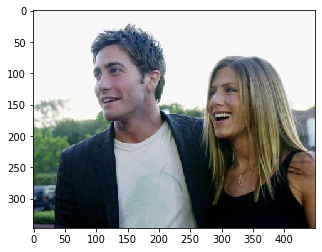

In [30]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
# Create figure and axes
fig,ax = plt.subplots(1)

plt.imshow(images[2][0], interpolation='nearest')
plt.show()

In [56]:
bbox = {0.605191256830601, 0.28368794326241137, 0.7745901639344263, 0.5975177304964538}

In [57]:
bbox

{0.28368794326241137,
 0.5975177304964538,
 0.605191256830601,
 0.7745901639344263}

In [84]:
y_min, x_min, y_max, x_max = bbox

In [59]:
y_min, x_min, y_max, x_max

(0.605191256830601,
 0.7745901639344263,
 0.5975177304964538,
 0.28368794326241137)

In [80]:
import cv2
import fastai

from fastai import *
from fastai.vision import *

In [125]:
test

{'label': ['Face'],
 'notes': '',
 'points': [{'x': 0.20355191256830601, 'y': 0.17375886524822695},
  {'x': 0.3948087431693989, 'y': 0.5177304964539007}],
 'imageWidth': 450,
 'imageHeight': 347}

In [124]:
test = images[2][1][0]

In [120]:
test['points'][0]

{'x': 0.20355191256830601, 'y': 0.17375886524822695}

In [78]:
from PIL import Image
im = Image.fromarray(image)
im.save("image.jpg")

In [81]:
img = open_image('image.jpg')

In [107]:
from PIL import Image, ImageDraw, ExifTags, ImageColor
image=Image.open('image.jpg')
imgWidth, imgHeight = image.size 
draw = ImageDraw.Draw(image) 

In [131]:
test

{'label': ['Face'],
 'notes': '',
 'points': [{'x': 0.20355191256830601, 'y': 0.17375886524822695},
  {'x': 0.3948087431693989, 'y': 0.5177304964539007}],
 'imageWidth': 450,
 'imageHeight': 347}

In [130]:
[{"annotations": [{"class": "fluke", "height": 372.0, "type": "rect", "width": 1017.0, "x": 14.0, "y": 97.0},

{'x': 0.20355191256830601, 'y': 0.17375886524822695}

In [126]:
box = test['label']
left = test['points'][0]
top = test['points'][1]
width = test['imageWidth']
height = test['imageHeight']


print('Left: ' + '{0:.0f}'.format(left))
print('Top: ' + '{0:.0f}'.format(top))
print('Face Width: ' + "{0:.0f}".format(width))
print('Face Height: ' + "{0:.0f}".format(height))

TypeError: unsupported format string passed to dict.__format__

In [ ]:
points = (
    (left,top),
    (left + width, top),
    (left + width, top + height),
    (left , top + height),
    (left, top)

)
draw.line(points, fill='#00d400', width=2)

In [112]:
image.show()

In [ ]:
for faceDetail in response['FaceDetails']:

In [82]:
import io
from PIL import Image, ImageDraw, ExifTags, ImageColor

def show_faces(photo,bucket):
     
    imgWidth, imgHeight = image.size  
    draw = ImageDraw.Draw(image)  
                    

    # calculate and display bounding boxes for each detected face       
    print('Detected faces for ' + photo)    
    for faceDetail in response['FaceDetails']:
        print('The detected face is between ' + str(faceDetail['AgeRange']['Low']) 
              + ' and ' + str(faceDetail['AgeRange']['High']) + ' years old')
        
        box = faceDetail['BoundingBox']
        left = imgWidth * box['Left']
        top = imgHeight * box['Top']
        width = imgWidth * box['Width']
        height = imgHeight * box['Height']
                

        print('Left: ' + '{0:.0f}'.format(left))
        print('Top: ' + '{0:.0f}'.format(top))
        print('Face Width: ' + "{0:.0f}".format(width))
        print('Face Height: ' + "{0:.0f}".format(height))

        points = (
            (left,top),
            (left + width, top),
            (left + width, top + height),
            (left , top + height),
            (left, top)

        )
        draw.line(points, fill='#00d400', width=2)

        # Alternatively can draw rectangle. However you can't set line width.
        #draw.rectangle([left,top, left + width, top + height], outline='#00d400') 

    image.show()

    return len(response['FaceDetails'])

TypeError: argument for rectangle() given by name ('color') and position (3)

In [ ]:

def draw_bbox(img, bbox, target=None, color=(255, 0, 0), thickness=2):
    y_min, x_min, y_max, x_max = map(int, bbox)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    if target is not None:
        y_min, x_min, y_max, x_max = map(int, target)
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=(0,255,0), thickness=thickness)
    return img